In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

def create_original_dataframe():
    original_df = pd.read_csv('../data/all_financial_with_keywords.csv') 
    original_df = original_df.drop_duplicates()
    return original_df

original_df = create_original_dataframe()

### Prep Target Column
def prep_target_variable(original_df, column='diff'):
    # Convert to percent based deltas
    original_df['open'] = original_df[column] + original_df['close']
    original_df['diff_percent'] = original_df[column] / original_df['close']
    
   # Remove the over 100% change values
    final_df = original_df[(original_df['diff_percent'] > -1.0) & (original_df['diff_percent'] < 1.0)]
    return final_df

original_df = prep_target_variable(original_df)
target_column = 'diff_percent'

### Setup Keyword Column Group and Dataframe
financial_columns = [
    'additional_paid_in_capital_trend', 'additional_paid_in_capital_recent',
    'total_assets_trend', 'total_assets_recent', 'total_current_liabilities_trend', 
    'total_current_liabilities_recent', 'total_liabilities_trend', 'total_liabilities_recent', 
    'cash_trend', 'cash_recent', 'total_capitalization_trend', 'total_capitalization_recent', 
    'total_current_assets_trend', 'total_current_assets_recent', 'volume', 
    'close', 'diff', 'price_public_total', 'public_price_per_share_x', 
    'public_price_per_share_y', target_column
]
fin_df = original_df[financial_columns]
fin_df.head()

,additional_paid_in_capital_trend,additional_paid_in_capital_recent,total_assets_trend,total_assets_recent,total_current_liabilities_trend,total_current_liabilities_recent,total_liabilities_trend,total_liabilities_recent,cash_trend,cash_recent,...,total_capitalization_recent,total_current_assets_trend,total_current_assets_recent,volume,close,diff,price_public_total,public_price_per_share_x,public_price_per_share_y,diff_percent
0,0.0,22499.0,0.0,523475.0,0.0,512320.0,0.0,512320.0,NaN,NaN,...,NaN,NaN,NaN,152320,18.75,0.5500,870000000.0,10.00,10.0,0.029333
1,4977413.0,5001957.0,103376.0,135313.0,105361.0,112752.0,0.0,112752.0,60673.0,62610.0,...,151128977.0,NaN,NaN,373250,9.75,-0.0200,150000000.0,10.00,10.0,-0.002051
2,4977413.0,5001957.0,103376.0,135313.0,105361.0,112752.0,0.0,112752.0,60673.0,62610.0,...,151128977.0,NaN,NaN,441200,0.50,0.0000,150000000.0,10.00,10.0,0.000000
3,137777.0,142245.0,37028.0,102776.0,3795.0,29372.0,6716.0,41456.0,0.0,10723.0,...,77942.0,4130.0,43376.0,252429,10.01,0.0500,36000000.0,24.25,10.0,0.004995
4,0.0,4999830.0,0.0,30000.0,0.0,6000.0,0.0,14000000.0,NaN,NaN,...,401024000.0,NaN,NaN,2450,9.75,-0.0714,400000000.0,10.00,10.0,-0.007323


# Group 3: Financial Data

This is the financial data that was found in the ipo_prospectus documents. Very difficult to extract a clear pattern that is shared between all documents.

## Cleaning

There are duplicates, outliers, and missing data.

In [120]:
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1929 entries, 0 to 2022
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   additional_paid_in_capital_trend   1620 non-null   float64
 1   additional_paid_in_capital_recent  1620 non-null   float64
 2   total_assets_trend                 1794 non-null   float64
 3   total_assets_recent                1794 non-null   float64
 4   total_current_liabilities_trend    1440 non-null   float64
 5   total_current_liabilities_recent   1440 non-null   float64
 6   total_liabilities_trend            1547 non-null   float64
 7   total_liabilities_recent           1547 non-null   float64
 8   cash_trend                         1419 non-null   float64
 9   cash_recent                        1419 non-null   float64
 10  total_capitalization_trend         1303 non-null   float64
 11  total_capitalization_recent        1303 non-null   float64
 1

In [121]:
fin_df.describe()

,additional_paid_in_capital_trend,additional_paid_in_capital_recent,total_assets_trend,total_assets_recent,total_current_liabilities_trend,total_current_liabilities_recent,total_liabilities_trend,total_liabilities_recent,cash_trend,cash_recent,...,total_capitalization_recent,total_current_assets_trend,total_current_assets_recent,volume,close,diff,price_public_total,public_price_per_share_x,public_price_per_share_y,diff_percent
count,1.620000e+03,1.620000e+03,1.794000e+03,1.794000e+03,1.440000e+03,1.440000e+03,1.547000e+03,1.547000e+03,1.419000e+03,1.419000e+03,...,1.303000e+03,1.175000e+03,1.175000e+03,1.929000e+03,1929.000000,1929.000000,1.929000e+03,1.929000e+03,1.929000e+03,1929.000000
mean,7.960376e+06,1.965062e+07,2.564165e+07,5.651022e+07,5.449403e+06,1.448243e+07,1.711772e+07,3.503356e+07,7.594607e+06,1.295687e+07,...,6.050407e+07,1.235483e+07,2.569747e+07,2.224012e+06,15.988233,0.116041,2.150178e+08,4.567881e+05,3.996146e+05,-0.011182
std,1.222263e+08,1.371313e+08,3.659173e+08,6.197117e+08,1.343877e+08,2.589416e+08,3.860131e+08,5.468248e+08,1.683373e+08,1.666332e+08,...,1.418925e+08,1.933648e+08,3.747014e+08,7.668779e+06,20.082138,3.136854,6.219996e+08,1.292992e+07,1.272817e+07,0.143868
min,-6.839788e+08,-2.985100e+04,-5.677396e+08,2.000000e+00,-9.036542e+08,2.000000e+00,-9.934567e+08,-1.033545e+06,-2.075756e+09,1.000000e-02,...,8.020000e+01,-4.637943e+08,1.200000e-01,1.000000e+02,0.022800,-28.490000,0.000000e+00,1.000000e-02,1.000000e-02,-0.994681
25%,0.000000e+00,2.569300e+04,0.000000e+00,1.273972e+05,0.000000e+00,3.573175e+04,0.000000e+00,5.809700e+04,0.000000e+00,2.286050e+04,...,1.348275e+05,0.000000e+00,3.878950e+04,1.070280e+05,7.850000,-0.300000,2.400000e+07,1.000000e+01,1.000000e+01,-0.034677
50%,0.000000e+00,3.851855e+05,4.174400e+04,4.193740e+05,1.175500e+03,1.409420e+05,1.910000e+02,3.029450e+05,0.000000e+00,1.053990e+05,...,7.358620e+05,6.660000e+02,1.682750e+05,4.445200e+05,10.500000,0.000000,1.008000e+08,1.000000e+01,1.000000e+01,0.000000
75%,3.926992e+05,5.000476e+06,3.663035e+05,5.024733e+06,9.950800e+04,9.512440e+05,1.593460e+05,3.955010e+06,1.102985e+05,6.651795e+05,...,6.414225e+07,1.128190e+05,1.776208e+06,1.405643e+06,20.110000,0.175000,2.400000e+08,1.800000e+01,1.800000e+01,0.019608
max,4.205601e+09,4.210213e+09,1.268344e+10,2.022169e+10,3.659522e+09,7.840389e+09,1.373672e+10,1.793204e+10,4.236084e+09,4.343529e+09,...,3.361752e+09,4.360011e+09,1.128362e+10,1.480917e+08,482.925700,68.140000,1.786400e+10,5.041800e+08,5.041800e+08,0.956989


### Duplicates

public_price_per_share_x and public_price_per_share_y are the same.

In [122]:
fin_df = fin_df.drop("public_price_per_share_x", axis=1, errors="ignore")
fin_df = fin_df.rename(columns={"public_price_per_share_y": "public_price_per_share"})
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1929 entries, 0 to 2022
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   additional_paid_in_capital_trend   1620 non-null   float64
 1   additional_paid_in_capital_recent  1620 non-null   float64
 2   total_assets_trend                 1794 non-null   float64
 3   total_assets_recent                1794 non-null   float64
 4   total_current_liabilities_trend    1440 non-null   float64
 5   total_current_liabilities_recent   1440 non-null   float64
 6   total_liabilities_trend            1547 non-null   float64
 7   total_liabilities_recent           1547 non-null   float64
 8   cash_trend                         1419 non-null   float64
 9   cash_recent                        1419 non-null   float64
 10  total_capitalization_trend         1303 non-null   float64
 11  total_capitalization_recent        1303 non-null   float64
 1

### Outliers

Very hard to determine as most it is hard to compare one company from another. Some companies operate at a different level than others. May need to make a relative column. There are a few that are way out there.

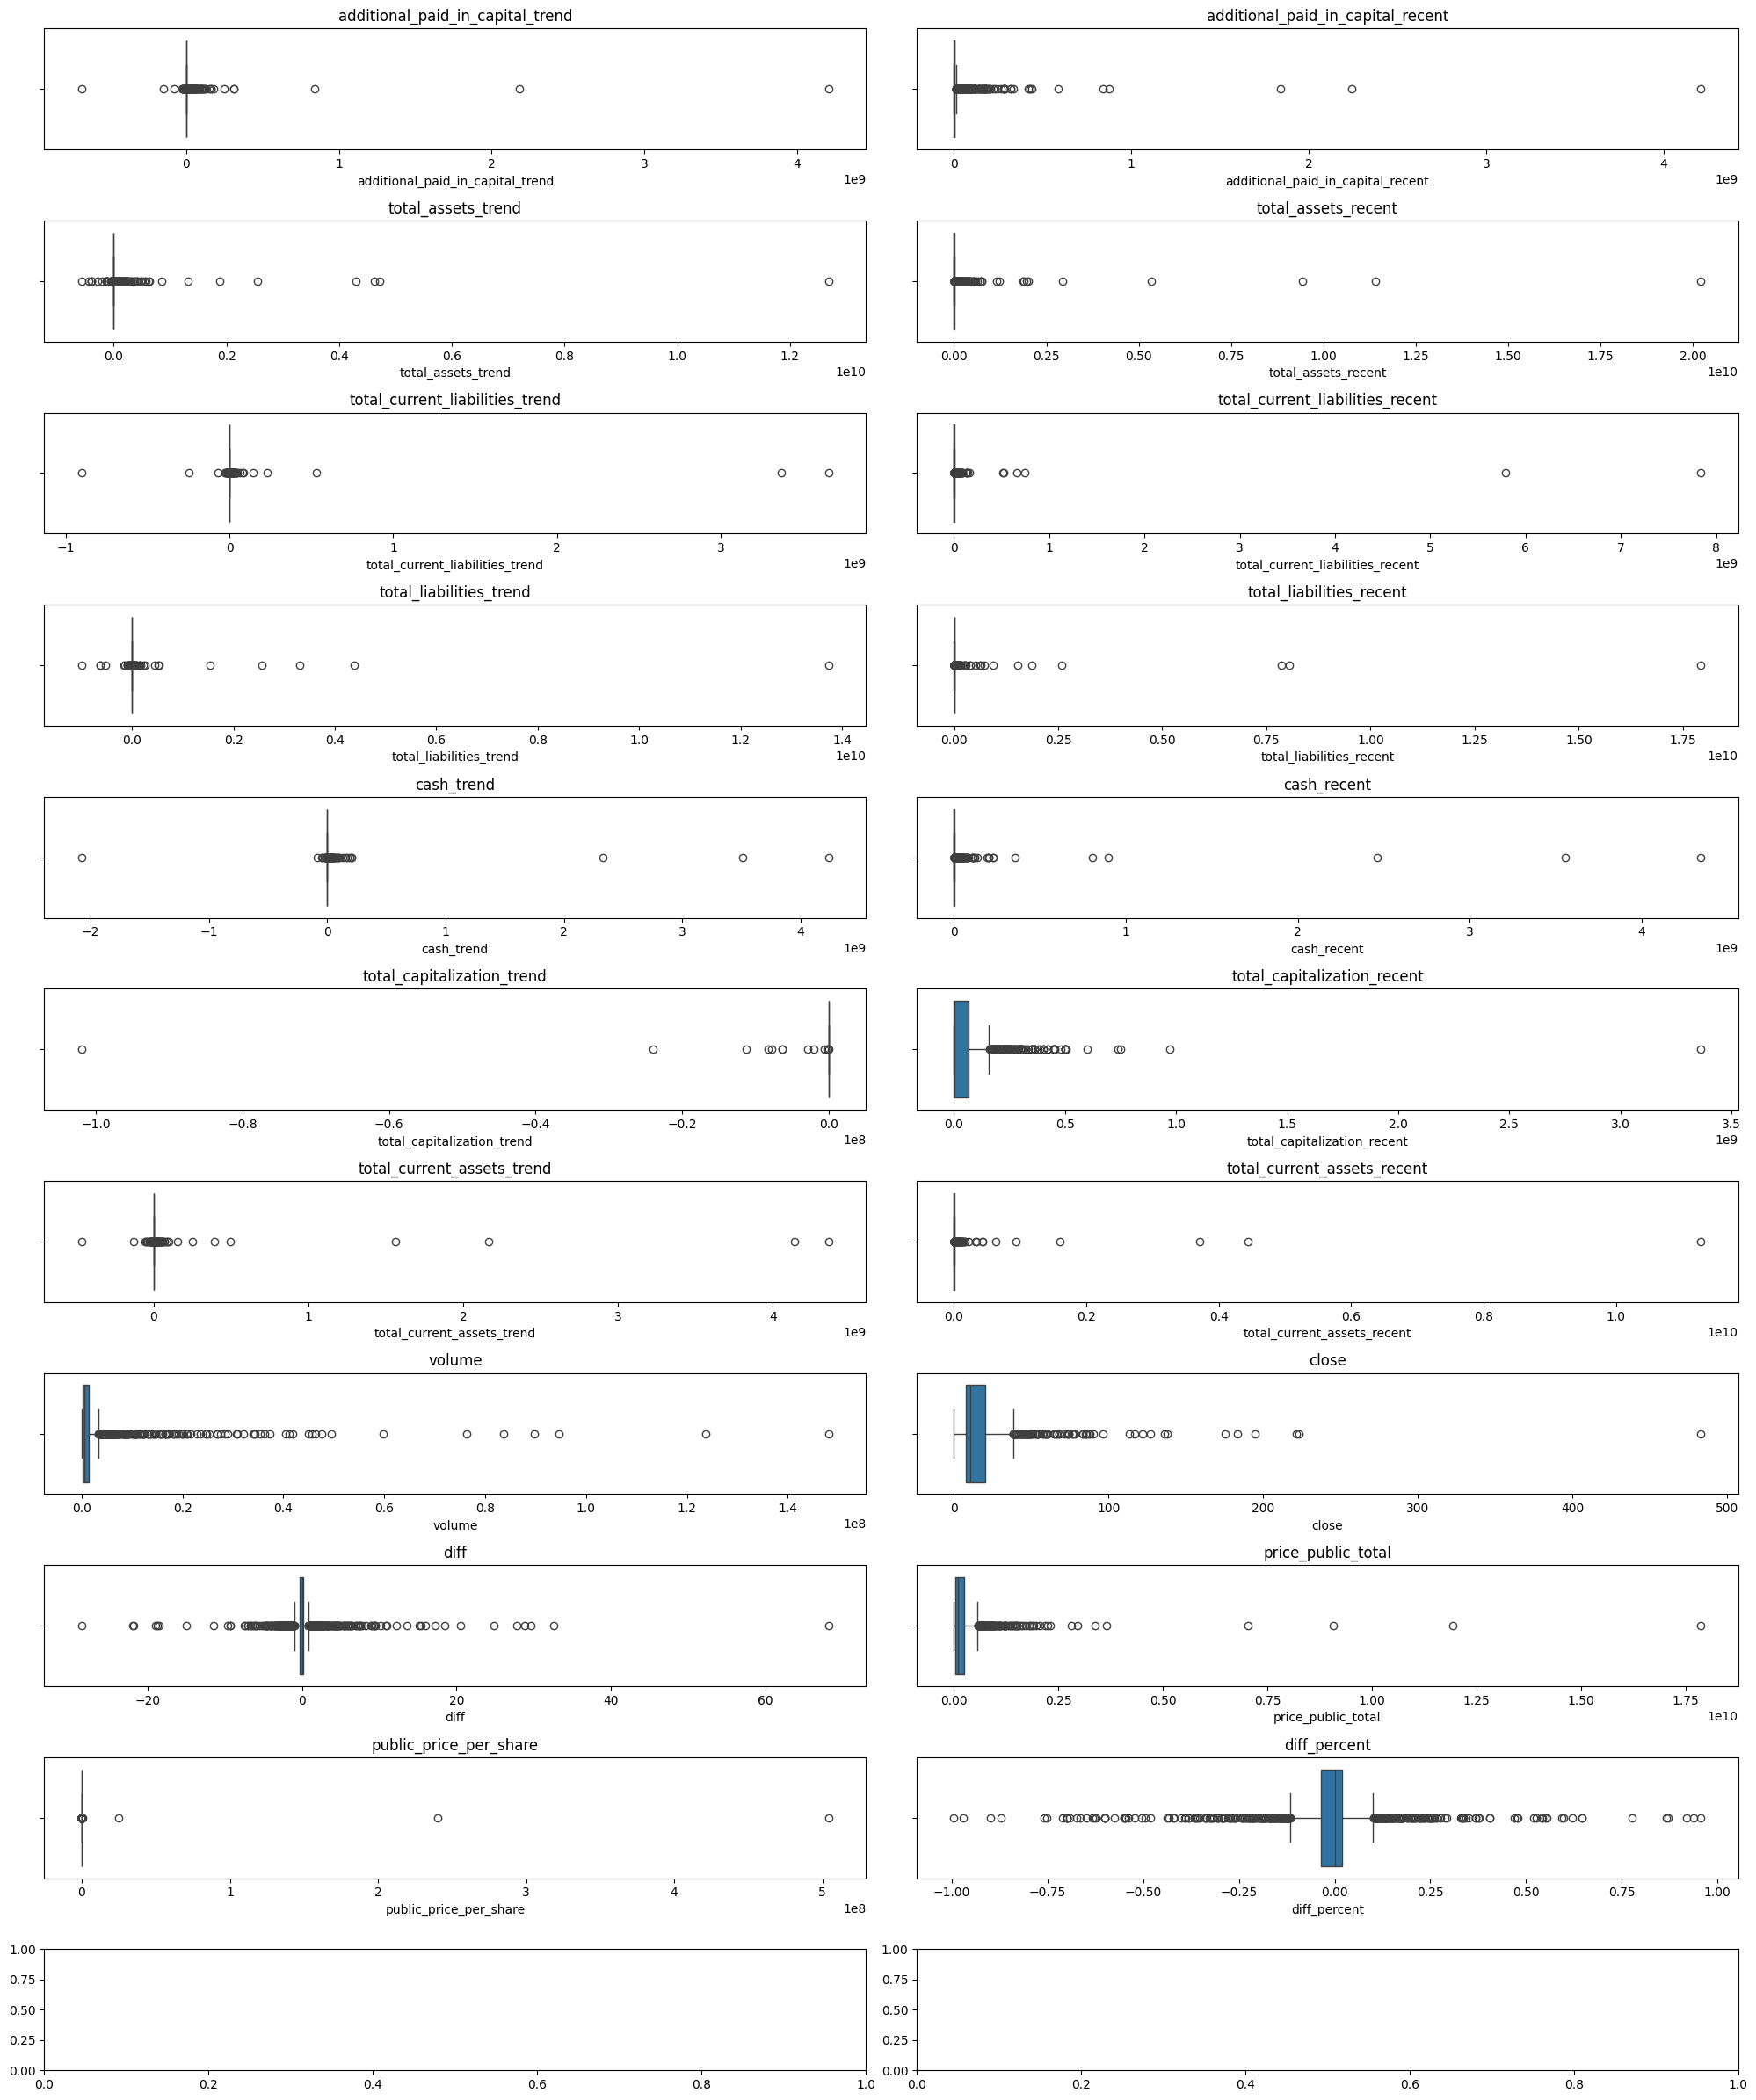

In [123]:
# Create Box Plots
cols=fin_df.columns
n = len(cols)

n_cols = 2
n_rows = 11

fig, axes = plt.subplots(n_rows, n_cols, figsize=[20,24])
axs = axes.flatten()

for ax, col in zip(axs, cols):
    sns.boxplot(x=fin_df[col], ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Unnecessary

Some columns are only to generate the target column and will not be available at inference time.

In [124]:
fin_df = fin_df.drop("close", axis=1, errors="ignore")
fin_df = fin_df.drop("volume", axis=1, errors="ignore")

## Distribution

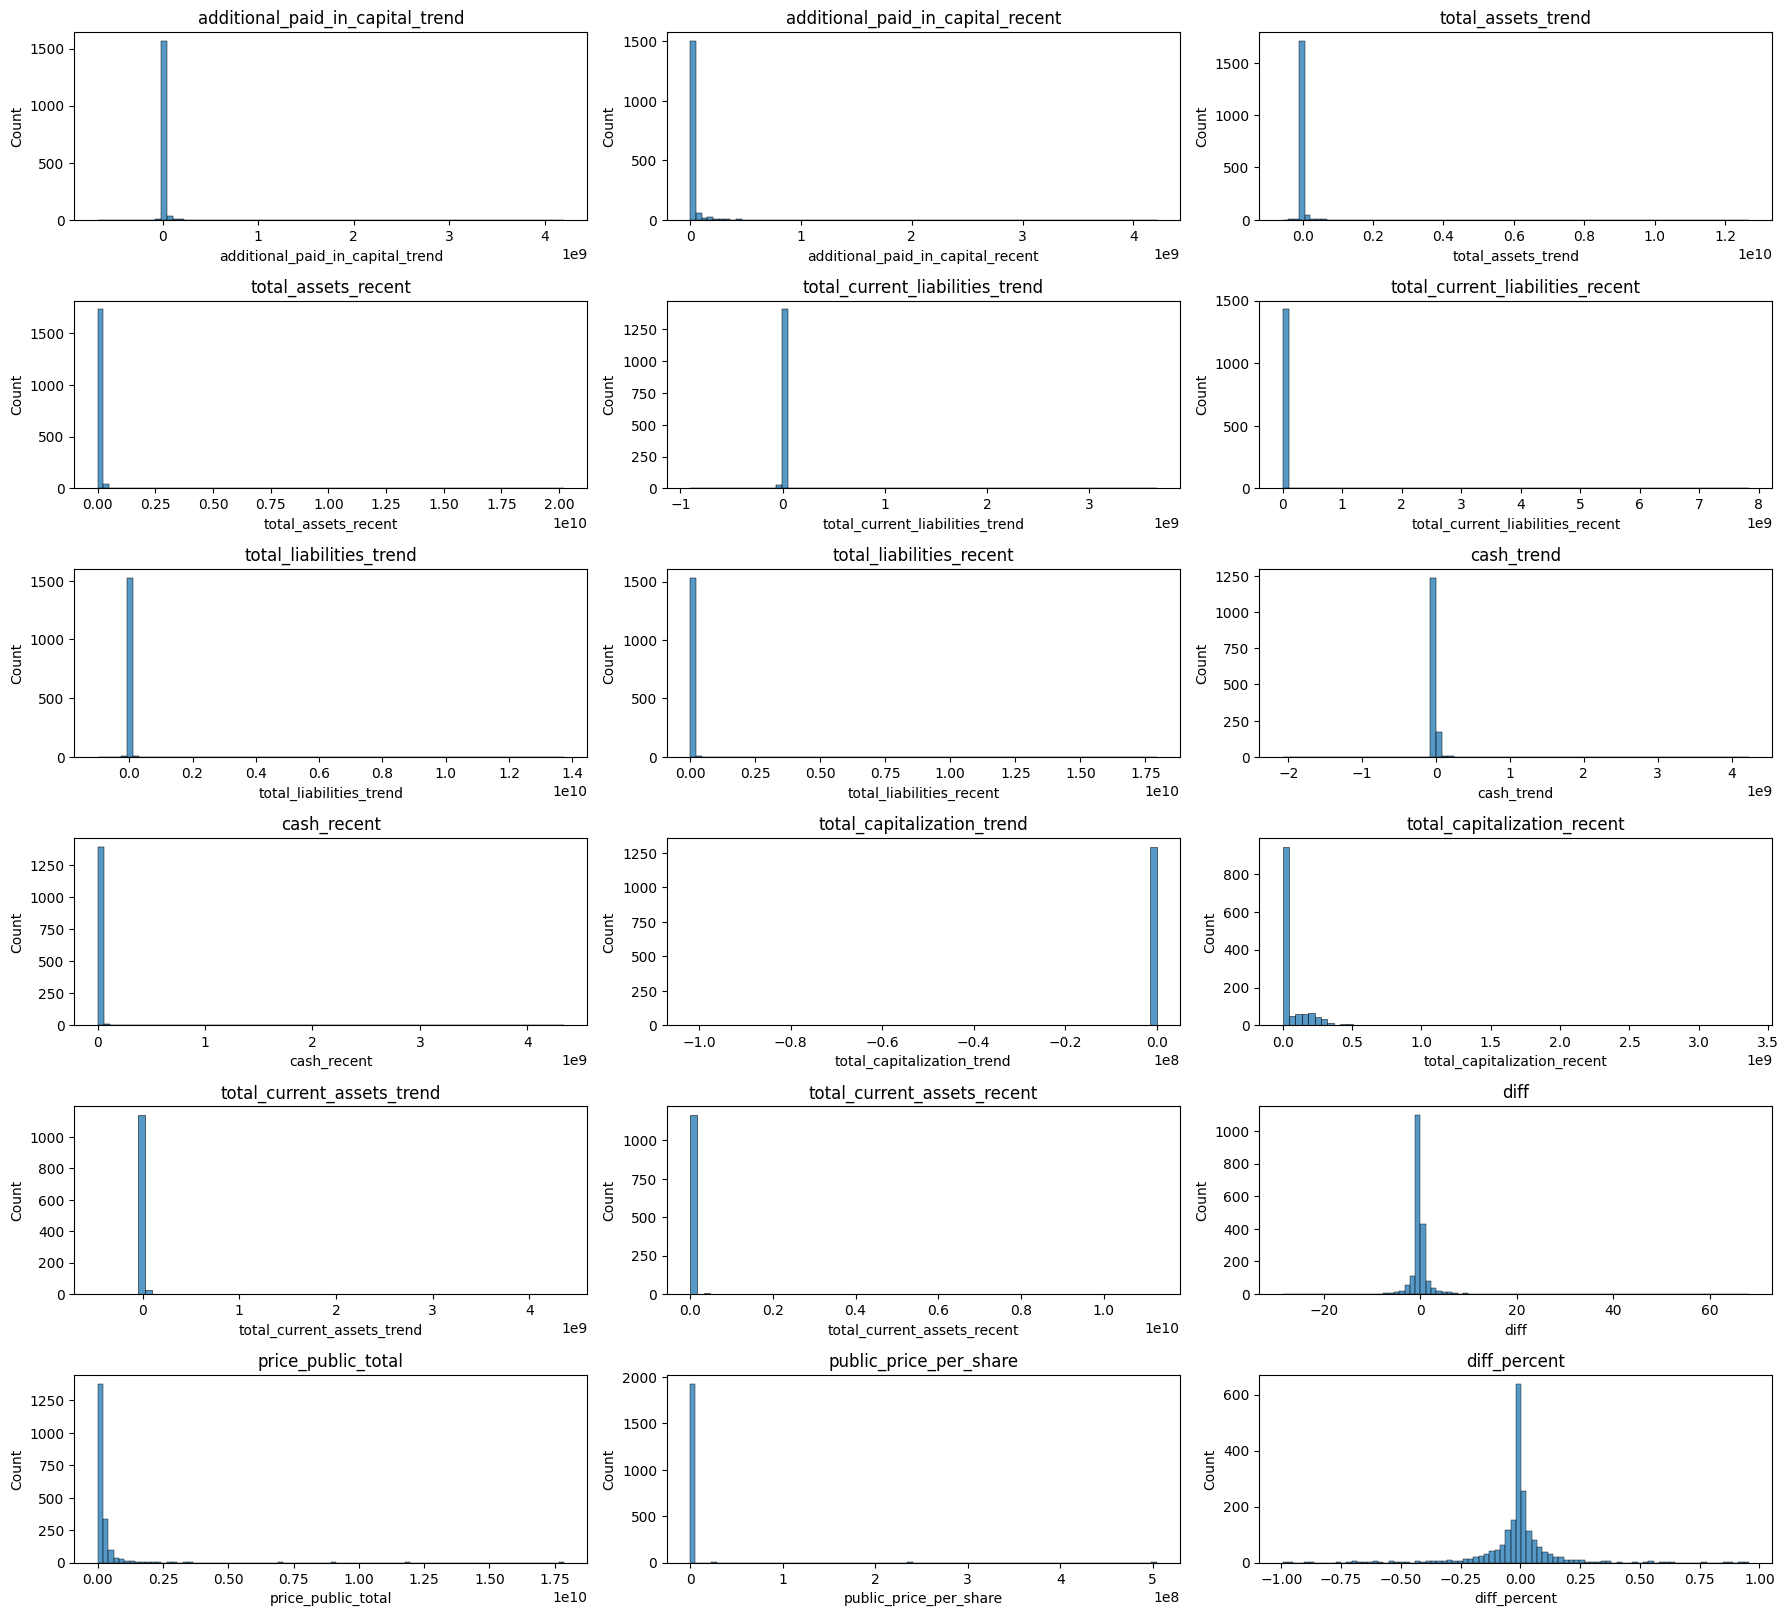

In [125]:
### View Distributions
cols=fin_df.columns
n = len(cols)

n_rows = 15
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 40))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.histplot(data=fin_df, x=col, ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## Correlation

In [126]:
count_correlations = fin_df.corr(method='spearman')[target_column]
count_correlations

additional_paid_in_capital_trend    -0.019281
additional_paid_in_capital_recent   -0.057790
total_assets_trend                  -0.013670
total_assets_recent                 -0.022829
total_current_liabilities_trend      0.048908
total_current_liabilities_recent    -0.037977
total_liabilities_trend              0.070342
total_liabilities_recent            -0.023204
cash_trend                           0.006220
cash_recent                         -0.042579
total_capitalization_trend          -0.023961
total_capitalization_recent          0.020654
total_current_assets_trend          -0.021483
total_current_assets_recent         -0.039695
diff                                 0.948877
price_public_total                   0.096000
public_price_per_share               0.084277
diff_percent                         1.000000
Name: diff_percent, dtype: float64

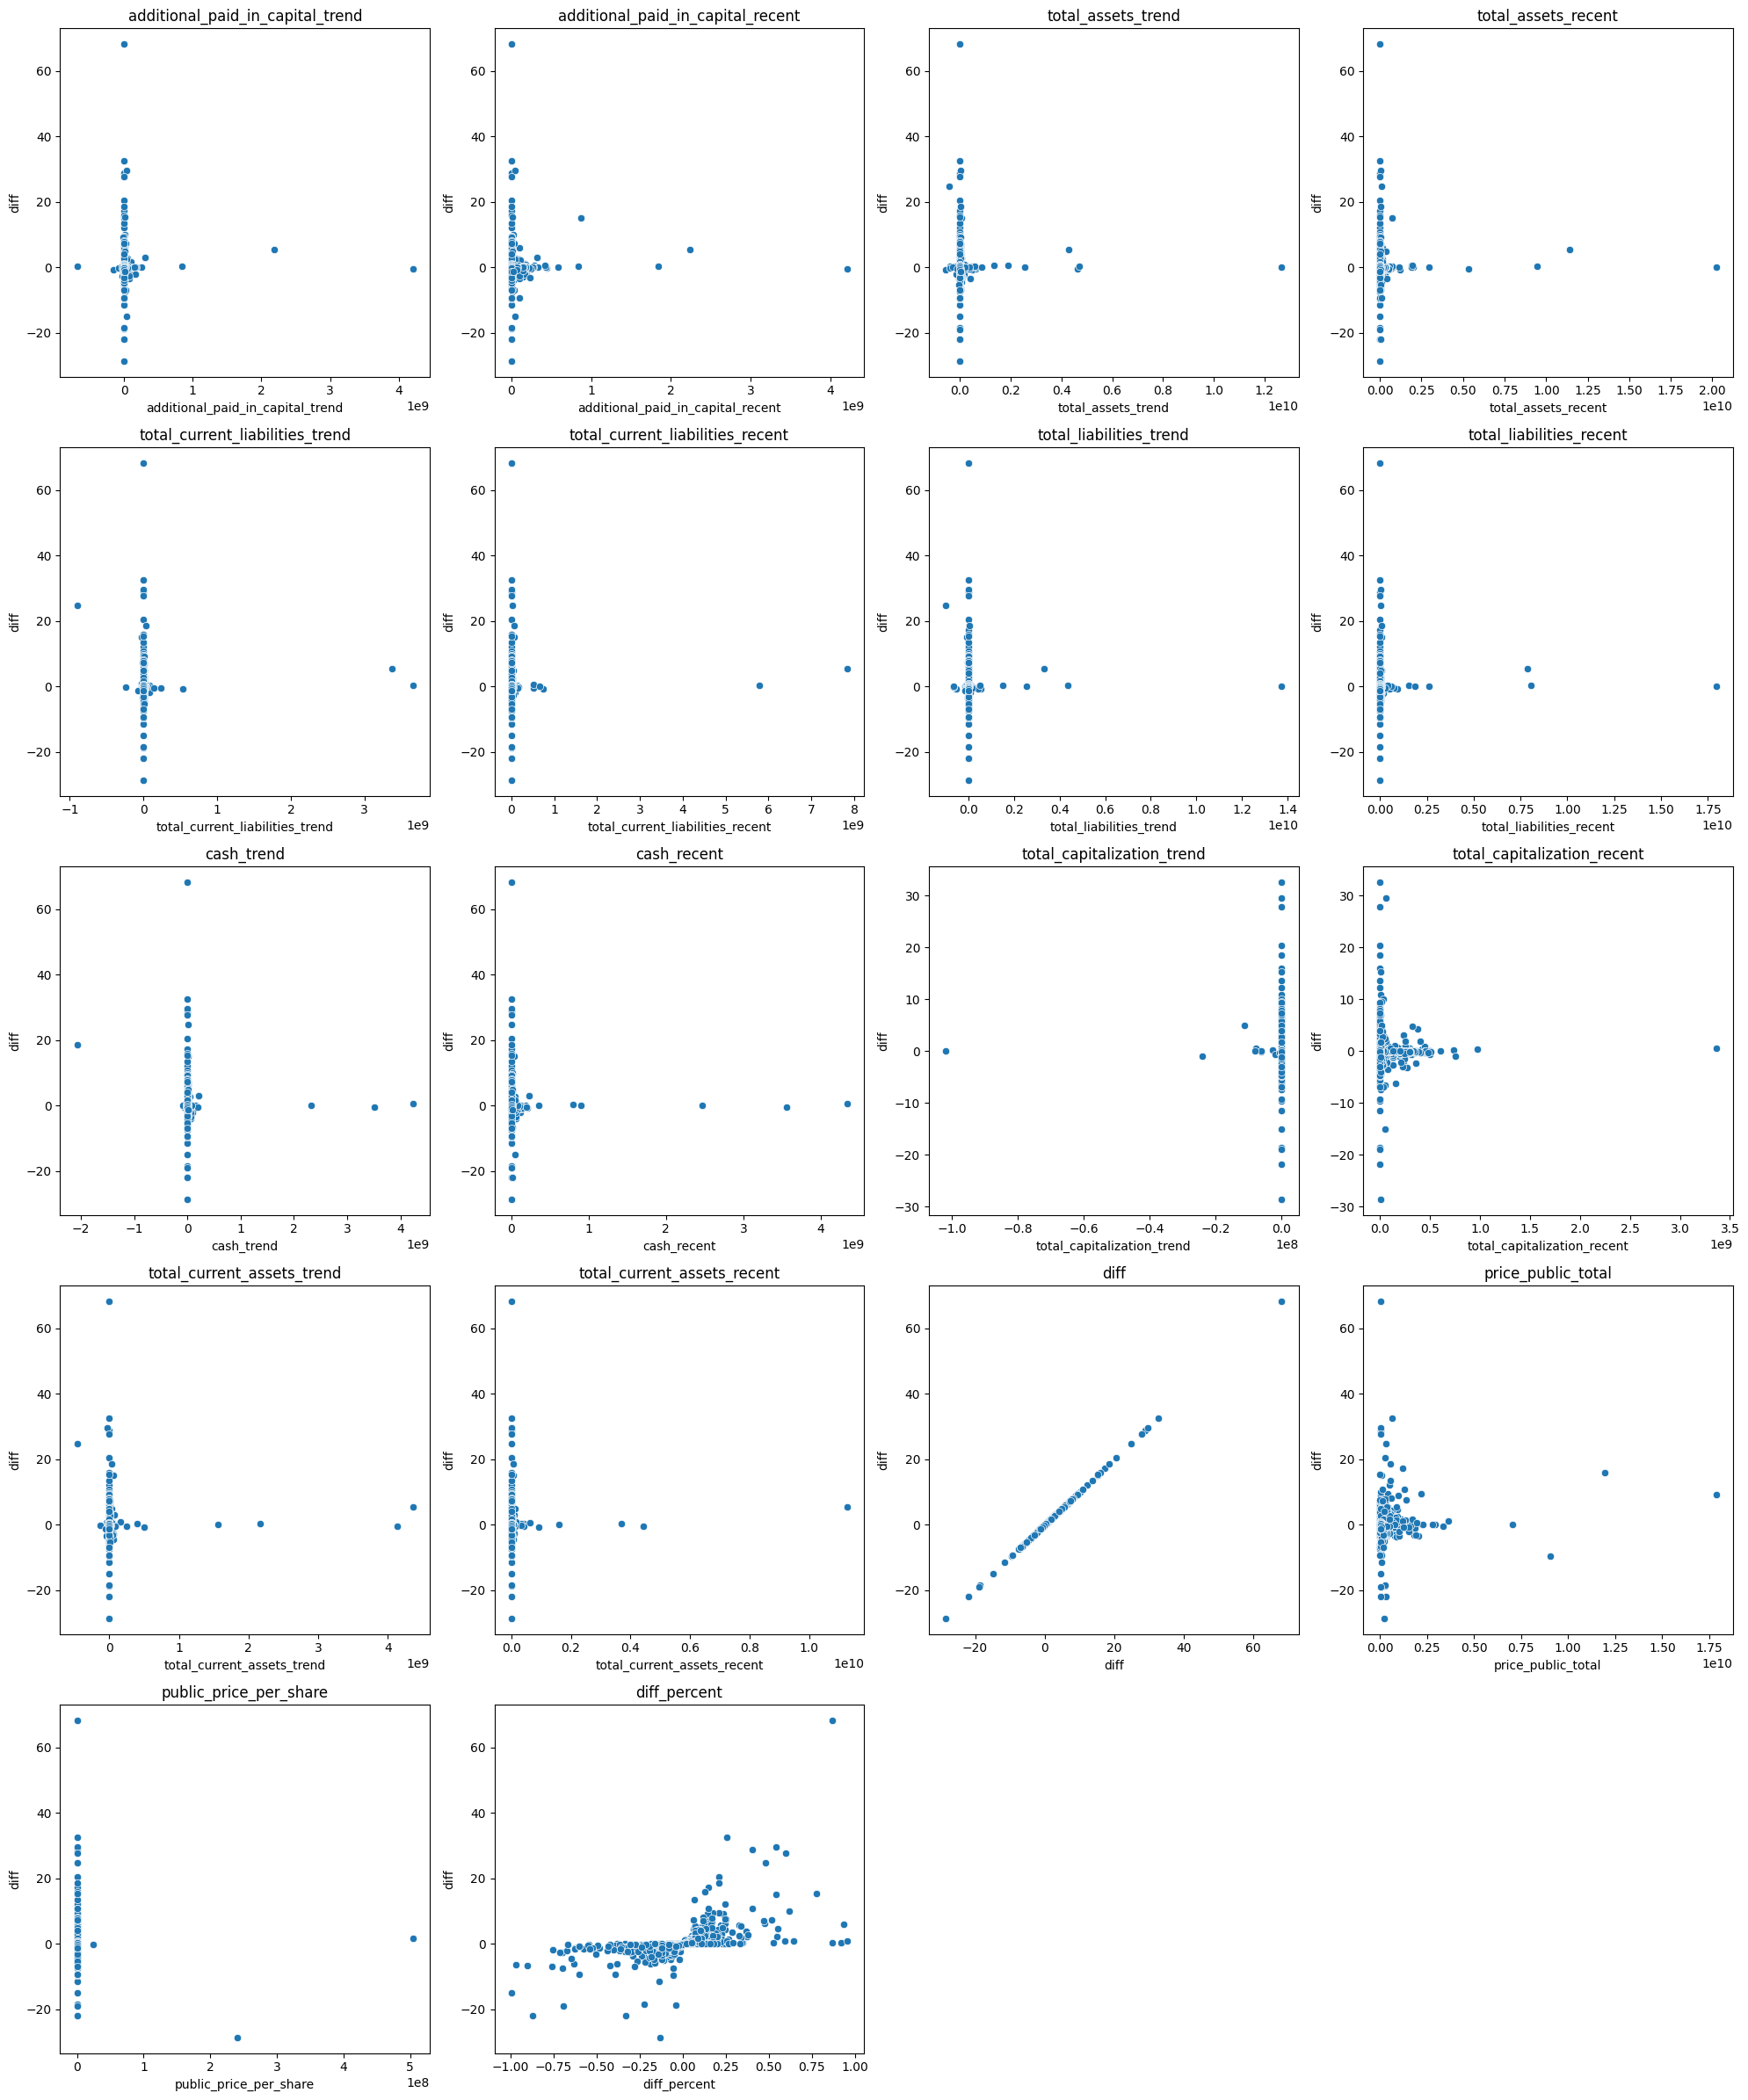

In [127]:
cols = fin_df.columns
n = len(cols)

n_cols = 4
n_rows = 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 24))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.scatterplot(data=fin_df, x=col, y='diff', ax=ax)
    ax.set_title(col)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## Feature Engineering

### Normalization

Since the data is based on company magnitudes, it is best to normalize the data.


In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(fin_df)

fin_df = pd.DataFrame(scaled_df, columns=fin_df.columns)

### Missing Data Flag

In [129]:
fin_df = fin_df.fillna(0)
fin_df['missing_financials'] = (fin_df==0).sum(axis=1)
fin_df['missing_financials'].value_counts()


missing_financials
0     674
2     384
4     310
6     256
8     170
10     83
14     26
12     26
Name: count, dtype: int64

In [130]:

for col in fin_df.columns:
    if col.endswith('_trend'):
        fin_df[col.replace('_trend', '_first')] = fin_df[col.replace('_trend', '_recent')] - fin_df[col]
        fin_df[col.replace('_trend', '_change')] = fin_df[col] / fin_df[col.replace('_trend', '_first')]
fin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   additional_paid_in_capital_trend   1929 non-null   float64
 1   additional_paid_in_capital_recent  1929 non-null   float64
 2   total_assets_trend                 1929 non-null   float64
 3   total_assets_recent                1929 non-null   float64
 4   total_current_liabilities_trend    1929 non-null   float64
 5   total_current_liabilities_recent   1929 non-null   float64
 6   total_liabilities_trend            1929 non-null   float64
 7   total_liabilities_recent           1929 non-null   float64
 8   cash_trend                         1929 non-null   float64
 9   cash_recent                        1929 non-null   float64
 10  total_capitalization_trend         1929 non-null   float64
 11  total_capitalization_recent        1929 non-null   float

### Computed Columns

Combine columns to generate new features.


In [131]:
def safe_ratio(numerator, denominator, fill_value=np.nan):
    """Calculate ratio safely, handling division by zero"""
    return np.where(denominator != 0, numerator / denominator, fill_value)

# Apply to all ratios
fin_df['asset_to_liability_ratio'] = safe_ratio(
    fin_df['total_assets_recent'], 
    fin_df['total_liabilities_recent']
)

fin_df['liability_to_capital_ratio'] = safe_ratio(
    fin_df['total_liabilities_recent'], 
    fin_df['total_capitalization_recent']
)

fin_df['asset_to_capital_ratio'] = safe_ratio(
    fin_df['total_assets_recent'], 
    fin_df['total_capitalization_recent']
)

fin_df['liability_to_assets_ratio'] = safe_ratio(
    fin_df['total_liabilities_recent'], 
    fin_df['total_assets_recent']
)

fin_df['assets_to_public_price_ratio'] = safe_ratio(
    fin_df['total_assets_recent'], 
    fin_df['public_price_per_share']
)

fin_df['liabilities_to_public_price_ratio'] = safe_ratio(
    fin_df['total_liabilities_recent'], 
    fin_df['public_price_per_share']
)

fin_df['asset_to_liability_ratio'].value_counts()

asset_to_liability_ratio
-0.000000    29
 1.987856     6
 1.426407     6
 1.423134     4
-0.108044     4
             ..
 1.469564     1
 1.423247     1
 1.446251     1
 1.420553     1
 1.299135     1
Name: count, Length: 1348, dtype: int64